In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [5]:
df1 = pd.read_csv("course_activity.csv")
df1.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80


In [6]:
df2 = pd.read_csv("students.csv")
df2.head()

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023


In [7]:
df3 = pd.read_csv("feedback.csv")
df3.head()

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


# Data Cleaning and Preparation

In [8]:
# Convert dates to datetime
df1["Date"] = pd.to_datetime(df1["Date"], dayfirst=True, errors='coerce')
df2['Enrolment_Date'] = pd.to_datetime(df2['Enrolment_Date'], dayfirst=True, errors='coerce')

In [9]:
# Check for missing and duplicate value df1 dataset
df1.isnull().sum()
df1.duplicated().sum()

0

In [10]:
# Check for missing and duplicate value df2 dataset
df2.isnull().sum()
df2.duplicated().sum()

0

In [11]:
# Check for missing and duplicate value df3 dataset
df3.isnull().sum()
df3.duplicated().sum()

0

No missing and duplicates values in df1, df2 & df3 dataset.


# Exploratory Data Analysis (EDA)

In [12]:
# Merge datasets for EDA
merged_df = df1.merge(df2, on='Student_ID', how='left')
merged_df = merged_df.merge(df3, on=['Student_ID', 'Course_ID'], how='left')

In [13]:
merged_df

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Name,Age,Gender,Location,Enrolment_Date,Rating,Feedback_Text
0,S001,PY202,2024-01-05,90,46.10,Student_1,24,Female,Kolkata,2023-11-24,NaN,NaN
1,S001,DM101,2024-01-28,155,88.87,Student_1,24,Female,Kolkata,2023-11-24,NaN,NaN
2,S001,UX303,2024-01-28,177,54.93,Student_1,24,Female,Kolkata,2023-11-24,NaN,NaN
3,S002,PY202,2024-02-03,45,32.20,Student_2,32,Other,Chennai,2023-02-27,3.0,Well structured
4,S002,UX303,2024-03-15,119,90.80,Student_2,32,Other,Chennai,2023-02-27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
654,S100,PY202,2024-03-03,83,22.63,Student_100,22,Other,Bangalore,2023-06-16,NaN,NaN
655,S100,UX303,2024-02-27,168,14.83,Student_100,22,Other,Bangalore,2023-06-16,NaN,NaN
656,S100,UX303,2024-01-02,134,22.29,Student_100,22,Other,Bangalore,2023-06-16,NaN,NaN
657,S100,WD404,2024-03-12,139,68.78,Student_100,22,Other,Bangalore,2023-06-16,NaN,NaN


# QUESTION 1: What is the overall average completion rate across courses?


In [14]:
# Overall Average Completion Rate
overall_avg_completion = merged_df['Completion_Percentage'].mean()
print(f"Overall Average Completion Rate: {overall_avg_completion:.2f}%")

Overall Average Completion Rate: 54.78%


# QUESTION 2: Which course has the highest and lowest average engagement time?

In [15]:
# 2. Courses with highest and lowest average engagement time
avg_time_by_course = merged_df.groupby('Course_ID')['Time_Spent_Minutes'].mean()
avg_time_by_course

Course_ID
DM101    102.427673
PY202     93.902439
UX303     99.816568
WD404     96.419162
Name: Time_Spent_Minutes, dtype: float64

In [16]:
highest_engagement_course = avg_time_by_course.idxmax(), avg_time_by_course.max()
highest_engagement_course

('DM101', 102.42767295597484)

In [17]:
lowest_engagement_course = avg_time_by_course.idxmin(), avg_time_by_course.min()
lowest_engagement_course

('PY202', 93.90243902439025)

# QUESTION 3: How does engagement differ by age group or location?


In [18]:
# Engagement by Age Group
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[15, 25, 35, 50], labels=['15-25', '26-35', '36-50'])
avg_time_by_age = merged_df.groupby('Age_Group')['Time_Spent_Minutes'].mean()
avg_time_by_age

Age_Group
15-25    100.758929
26-35     95.362229
36-50           NaN
Name: Time_Spent_Minutes, dtype: float64

In [19]:
# Engagement by Location
location_engagement = merged_df.groupby('Location')['Time_Spent_Minutes'].mean()
print(f'location_engagement',location_engagement)

location_engagement Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64


# QUESTION 4: What is the average feedback rating per course?


In [20]:
avg_rating = merged_df.groupby('Course_ID')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Feedback Rating per Course:")
print(avg_rating)


Average Feedback Rating per Course:
Course_ID
PY202    3.236842
DM101    3.113636
UX303    2.764706
WD404    2.608696
Name: Rating, dtype: float64


# QUESTION 5: Is there a correlation between completion rate and feedback rating?

In [21]:
corr_df = merged_df[['Completion_Percentage', 'Rating']].dropna()
correlation = corr_df.corr().iloc[0,1]
print(f"🔗 Correlation between Completion % and Rating: {correlation:.2f}")

🔗 Correlation between Completion % and Rating: -0.05


# QUESTION 6: Identify top 3 student segments based on engagement and satisfaction.

In [22]:
student_engagement = merged_df.groupby("Student_ID")["Time_Spent_Minutes"].mean()
student_rating = merged_df.groupby("Student_ID")["Rating"].mean()

student_summary = pd.DataFrame({
    "Avg Engagement": student_engagement,
    "Avg Rating": student_rating
}).dropna()

# Define a simple engagement-satisfaction score
student_summary["Score"] = student_summary["Avg Engagement"] * student_summary["Avg Rating"]
top_segments = student_summary.sort_values(by="Score", ascending=False).head(3)
print(top_segments)

            Avg Engagement  Avg Rating       Score
Student_ID                                        
S077            140.125000         5.0  700.625000
S036            123.400000         5.0  617.000000
S039            118.444444         5.0  592.222222


# Visualisations

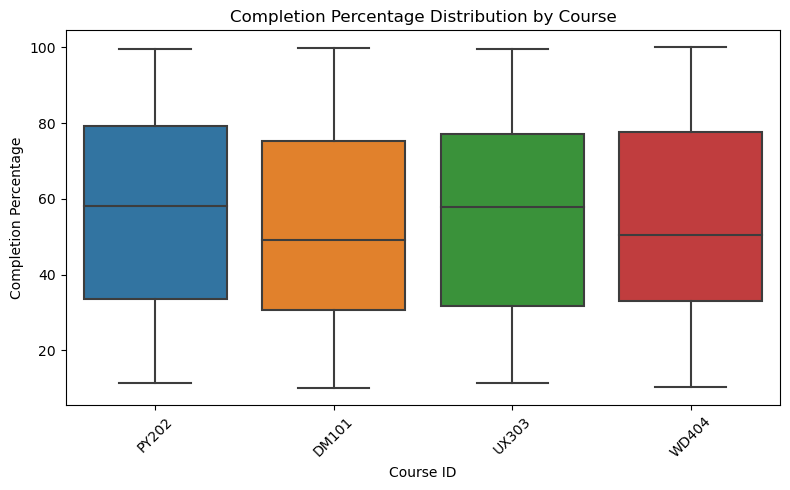

In [23]:
# Average Completion Percentage by Course
plt.figure(figsize=(8, 5))
sns.boxplot(x="Course_ID", y="Completion_Percentage", data=merged_df)
plt.title("Completion Percentage Distribution by Course")
plt.xlabel("Course ID")
plt.ylabel("Completion Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Time Spent (Minutes)')

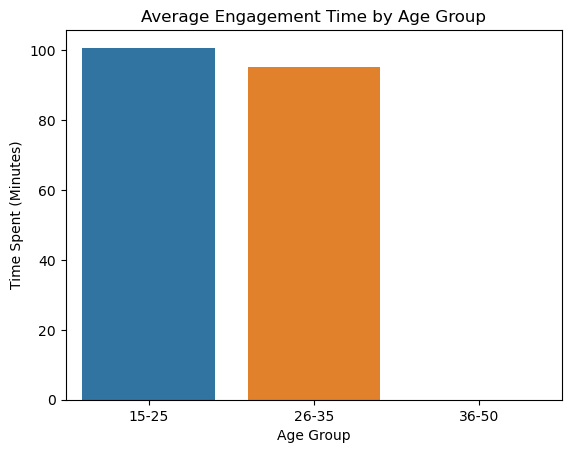

In [24]:
#2. Engagement Time by Age Group
    
sns.barplot(x=avg_time_by_age.index, y=avg_time_by_age.values)
plt.title("Average Engagement Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Time Spent (Minutes)")

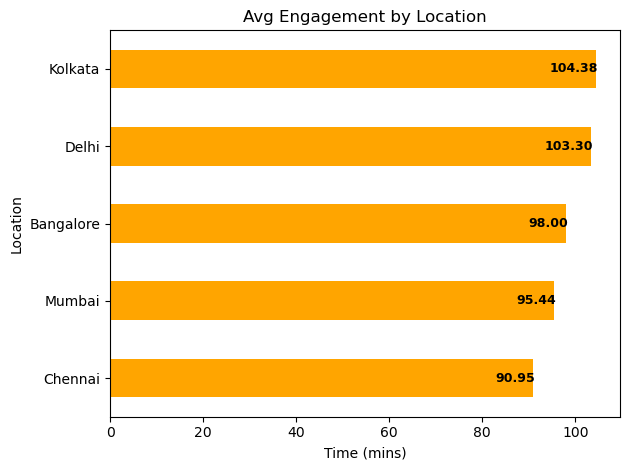

In [25]:
# Engagement Time by Location

ax=location_engagement.sort_values().plot(kind='barh', title="Avg Engagement by Location", xlabel="Time (mins)", color='orange')
for i, value in enumerate(location_engagement.sort_values()):
    ax.text(value + 0.5,i,f"{value:.2f}", va='center',ha='right', fontsize = 9,color='Black', fontweight='bold')
plt.tight_layout()
plt.show()

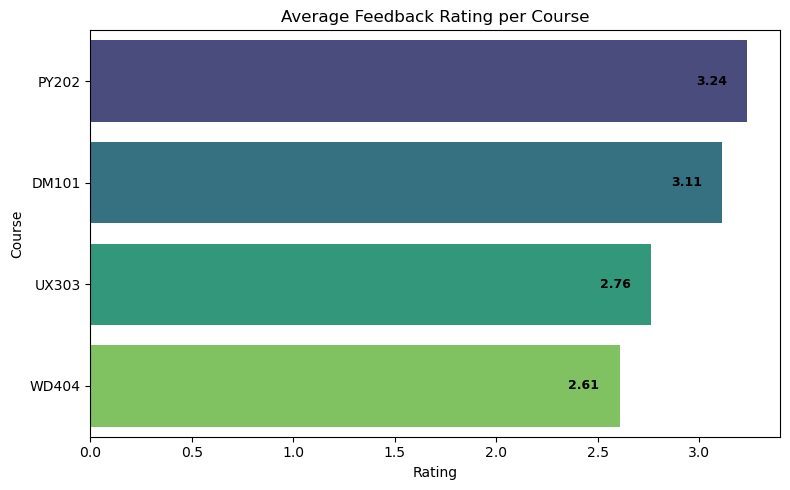

In [26]:
# 3. Average Feedback Rating per Course

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')

# Add rating values on the bars
for i, v in enumerate(avg_rating.values):
    ax.text(v - 0.1, i, f"{v:.2f}", color='Black', ha='right', va='center', fontsize=9, fontweight='bold')
plt.title("Average Feedback Rating per Course")
plt.xlabel("Rating")
plt.ylabel("Course")
plt.tight_layout()
plt.show()

🔗 Correlation between Completion % and Rating: -0.05


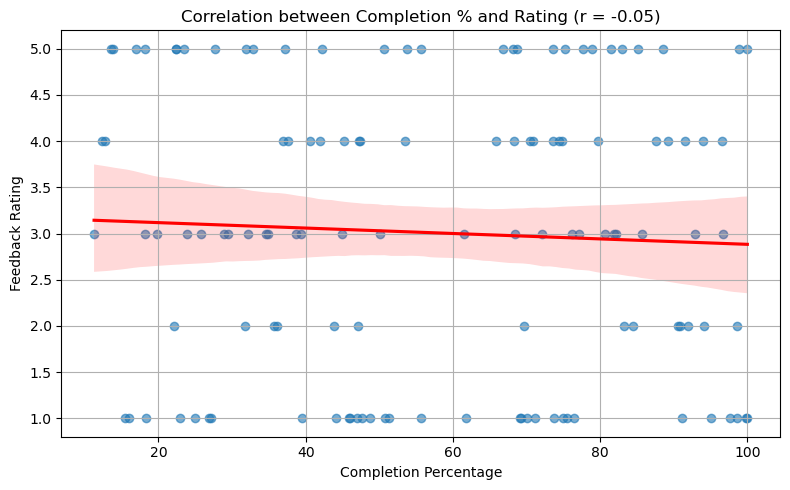

In [27]:
# 4. Correlation between Completion % and Rating (Scatter)

corr_df = merged_df[['Completion_Percentage', 'Rating']].dropna()
correlation = corr_df.corr().iloc[0,1]
print(f"🔗 Correlation between Completion % and Rating: {correlation:.2f}")
plt.figure(figsize=(8, 5))
sns.regplot(data=corr_df, x='Completion_Percentage', y='Rating', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f"Correlation between Completion % and Rating (r = {correlation:.2f})")
plt.xlabel("Completion Percentage")
plt.ylabel("Feedback Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

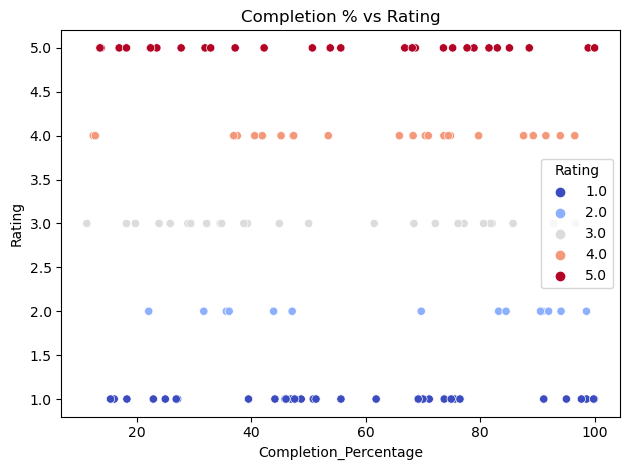

In [28]:
# Scatter Plot
sns.scatterplot(data=corr_df, x='Completion_Percentage', y='Rating', hue='Rating', palette='coolwarm')
plt.title("Completion % vs Rating")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Course ID')

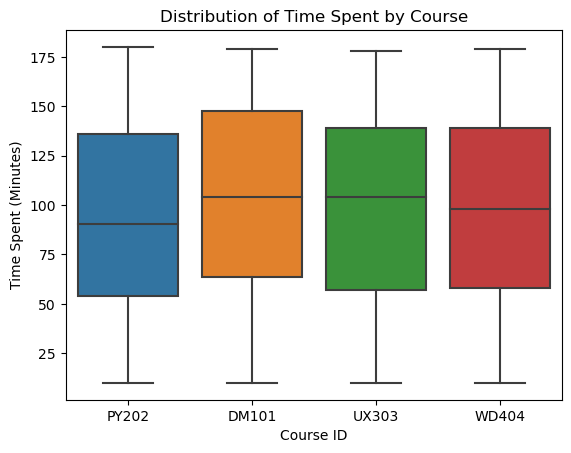

In [29]:
#Time Spent Distribution by Course

plt.figure()
sns.boxplot(data=merged_df, x='Course_ID', y='Time_Spent_Minutes')
plt.title("Distribution of Time Spent by Course")
plt.ylabel("Time Spent (Minutes)")
plt.xlabel("Course ID")